# Support Vector Machine (SVM)
SVM is a linear-based model that follows the linear equation in (1) to predict values:

$\begin{equation}
    y_{i}(\omega x_{i} - b)\geq 1,~y_{i}\in\{-1, 1\}
\end{equation}$

where $\omega$ is the weight of the model, $x$ represents the independent data, and $b$ shows the bias. The Hinge Loss is used to evaluate the predictions. For example, relying on MSE, we have

$\begin{equation}
    \mathcal{L} = \max(0, 1 - y_{i}(\omega x_{i} - b))
\end{equation}$

A regularization term (L2-norm penalty), i.e., $\lambda\|\omega\|^{2}$ is added to the objective function to make a tradeoff between minimizing the Hinge Loss and maximizing the distance between the hyperplane and the support vectors, i.e., $\frac{2}{\|\omega\|}$. To maximize $\frac{2}{\|\omega\|}$, $\|\omega\|$ must be minimized. This implies that $\lambda\|\omega\|^{2}$ must be minimized.

$\begin{equation}
    \mathcal{J} = \lambda\|\omega\|^{2} + \frac{1}{n}\sum_{i=1}^{n}\max(0, 1 - y_{i}(\omega x_{i} - b))
\end{equation}$

## How to Implement LogisticRegression for Binary Classification
We use stochastic gradient descent (SGD) to train the model. Hence, assuming a learning rate of $\alpha$ and the maximum number of iterations $n\_iters$, we

1. initialize the weigths as zero
2. initialize the bias as zero
3. Make sure that $y\in]{-1, 1\}$
4. calculate $\frac{\partial \mathcal{J}}{\partial\omega}$:

$\begin{equation}
    \frac{\partial \mathcal{J}}{\partial\omega} = 
    \begin{cases}
        2\lambda\omega & \text{if~} y_{i}(\omega x_{i} - b) >= 1\\
        2\lambda\omega - y_{i}x_{i} & otherwise
    \end{cases}
\end{equation}$

5. calculate $\frac{\partial \mathcal{J}}{\partial b}$

$\begin{equation}
    \frac{\partial \mathcal{J}}{\partial b} = 
    \begin{cases}
        0 & \text{if~} y_{i}(\omega x_{i} - b) >= 1\\
        y_{i} & otherwise
    \end{cases}
\end{equation}$

6. update weights as $\omega = \omega - \alpha.\frac{\partial \mathcal{J}}{\partial\omega}$
7. update bias as $b = b - \alpha.\frac{\partial \mathcal{J}}{\partial b}$
8. repeat steps 3 - 6 for $n\_iters$ times

For the inference part, we use the updated weights and bias in Eq. (1) and calculate the objective function using Eq. (3).

It is worth noting that the current document is based on the guidelines provided in https://www.youtube.com/watch?v=T9UcK-TxQGw.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### SVM Class

In [2]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr           = lr
        self.lambda_param = lambda_param
        self.n_iters      = n_iters
        self.weights      = None
        self.bias         = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        label = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for ind, x in enumerate(X):
                condition = label[ind] * (np.dot(x, self.weights) - self.bias) >= 1
                l_norm = 2 * self.lambda_param * self.weights
                dw = l_norm if condition else l_norm - np.dot(x, label[ind])
                db = 0 if condition else label[ind]

                self.weights -= self.lr * dw
                self.bias    -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) - self.bias

        return np.sign(y_pred)

## Fit and Evaluate Model

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
def plot(clf):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "r")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

Accuracy:  100.00


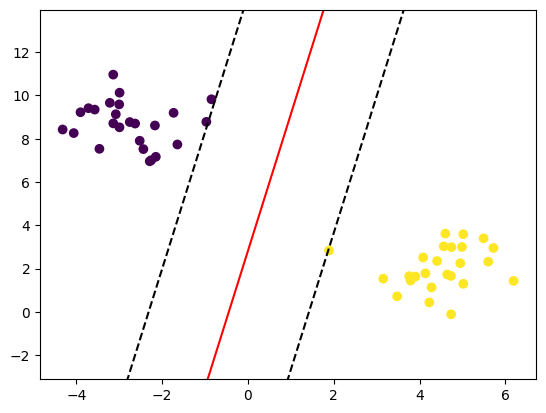

In [5]:
if __name__ == "__main__":
    X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=42)
    y = np.where(y == 0, -1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # train
    clf = SVM()
    clf.fit(X_train, y_train)
    
    # inference
    y_pred = clf.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"Accuracy: {accuracy*100: .2f}")

    plot(clf)